In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import os

In [5]:
df = pd.read_csv(r"C:\Users\mehul\OneDrive\Documents\datasets\clinical-data-for Alzheimers.csv")
df.head()

,Subject,Gender,mmse,ageAtEntry,cdr,memory,dx1
0,OAS30124,female,16,79.14579,1.0,1,'AD Dementia'
1,OAS30124,female,21,79.14579,0.5,0.5,'AD Dementia'
2,OAS31129,female,20,68.07666,1.0,1,'AD Dementia'
3,OAS31129,female,28,68.07666,1.0,1,'AD Dementia'
4,OAS31129,female,29,68.07666,0.5,0.5,'AD Dementia'


In [6]:
df['mmse'] = df['mmse'].str.replace(r'?', '72')
df['mmse'] = df['mmse'].str.replace(r'?','1')

df = df.dropna()
df.isnull().sum().sum()

C:\Users\mehul\AppData\Local\Temp\ipykernel_12592\329097789.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['mmse'] = df['mmse'].str.replace(r'?', '72')
C:\Users\mehul\AppData\Local\Temp\ipykernel_12592\329097789.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['mmse'] = df['mmse'].str.replace(r'?','1')


0

In [7]:
X = df
Y = df['dx1']
del df

remove_columns = list(X.columns)[0:1]
remove_columns.append('dx1')

print("removing columns :", remove_columns)

X = X.drop(remove_columns, axis=1)

features = list(X.columns)
X.head(5)

removing columns : ['Subject', 'dx1']


,Gender,mmse,ageAtEntry,cdr,memory
0,female,16,79.14579,1.0,1
1,female,21,79.14579,0.5,0.5
2,female,20,68.07666,1.0,1
3,female,28,68.07666,1.0,1
4,female,29,68.07666,0.5,0.5


In [10]:
numerical_vars = ['ageAtEntry','mmse','cdr','memory']
categorical_vars = list(set(features)- set(numerical_vars))

print("Categorical variable distribution :\n")

for var in categorical_vars:
    print('\nDistribution of',var)
    
    print(X[var].value_counts())

Categorical variable distribution :


Distribution of Gender
male      692
female    537
Name: Gender, dtype: int64


Numerical Variable Distribution :



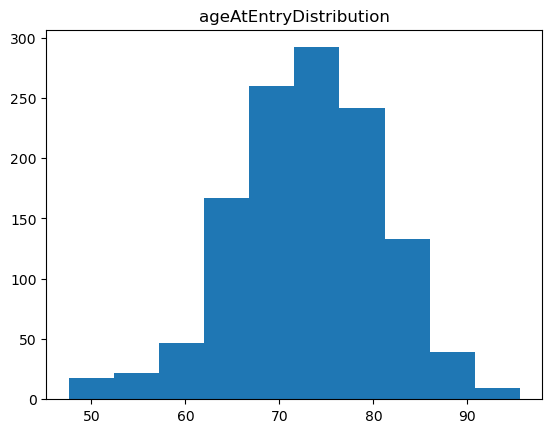

count    1229.000000
mean       72.900069
std         7.739166
min        47.605750
25%        67.550995
50%        73.013010
75%        78.650240
max        95.567420
Name: ageAtEntry, dtype: float64
73.344284    15
50.291580    14
69.609856    10
67.129364    10
68.303900    10
             ..
80.229980     1
65.308690     1
73.503080     1
60.301163     1
76.966460     1
Name: ageAtEntry, Length: 416, dtype: int64


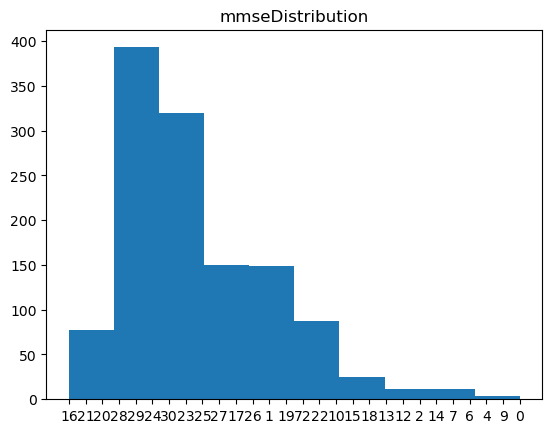

count     1229
unique      28
top         29
freq       177
Name: mmse, dtype: object
29    177
30    141
28    139
27    133
26    116
25    112
24     77
23     67
22     55
21     38
19     32
72     28
20     26
17     17
18     16
16     13
15      9
12      8
14      7
10      4
13      3
6       3
7       2
9       2
1       1
2       1
4       1
0       1
Name: mmse, dtype: int64


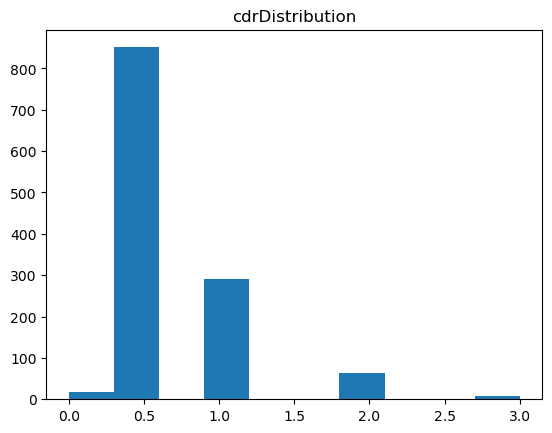

count    1229.000000
mean        0.702604
std         0.415548
min         0.000000
25%         0.500000
50%         0.500000
75%         1.000000
max         3.000000
Name: cdr, dtype: float64
0.5    851
1.0    291
2.0     63
0.0     17
3.0      7
Name: cdr, dtype: int64


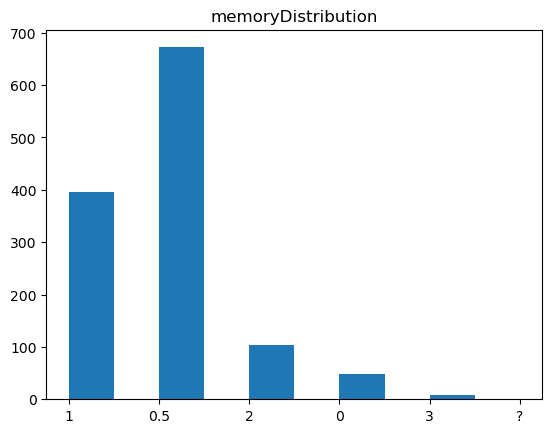

count     1229
unique       6
top        0.5
freq       672
Name: memory, dtype: object
0.5    672
1      395
2      104
0       48
3        9
?        1
Name: memory, dtype: int64


In [11]:
%matplotlib inline 

print('Numerical Variable Distribution :\n')

for var in numerical_vars:
    plt.hist(X[var],bins=10)
    plt.title(var+'Distribution')
    plt.show()
    
    print(X[var].describe())
    print(X[var].value_counts())
    

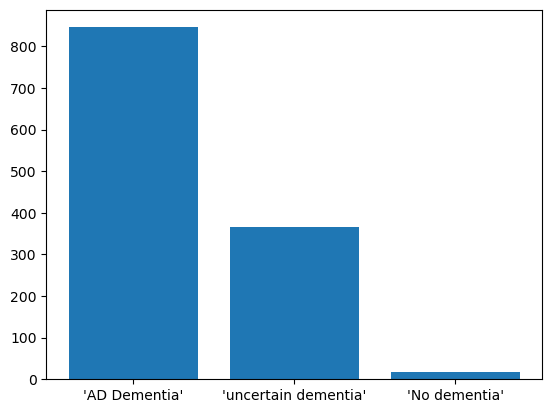

In [12]:
plt.bar(Y.value_counts().index,Y.value_counts())
plt.show()
